In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score

# 系统库
import os, sys

In [2]:

# 数据加载，避免中文乱码问题
# 加载测试数据集
import os
oriDataSet = pd.read_csv(os.path.join(os.path.abspath('.'), 'heros.csv'), encoding='gb18030')

In [3]:
features = [u'最大生命', u'生命成长', u'初始生命',u'最大法力', u'法力成长',
            u'初始法力', u'最高物攻', u'物攻成长',u'初始物攻', u'最大物防',
            u'物防成长', u'初始物防', u'最大每5秒回血', u'每5秒回血成长',
            u'初始每5秒回血', u'最大每5秒回蓝', u'每5秒回蓝成长', u'初始每5秒回蓝',
            u'最大攻速', u'攻击范围']
dataSet = oriDataSet[features]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/Users/guchen/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/guchen/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/guchen/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 29983 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/guchen/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/guchen/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25104 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Us

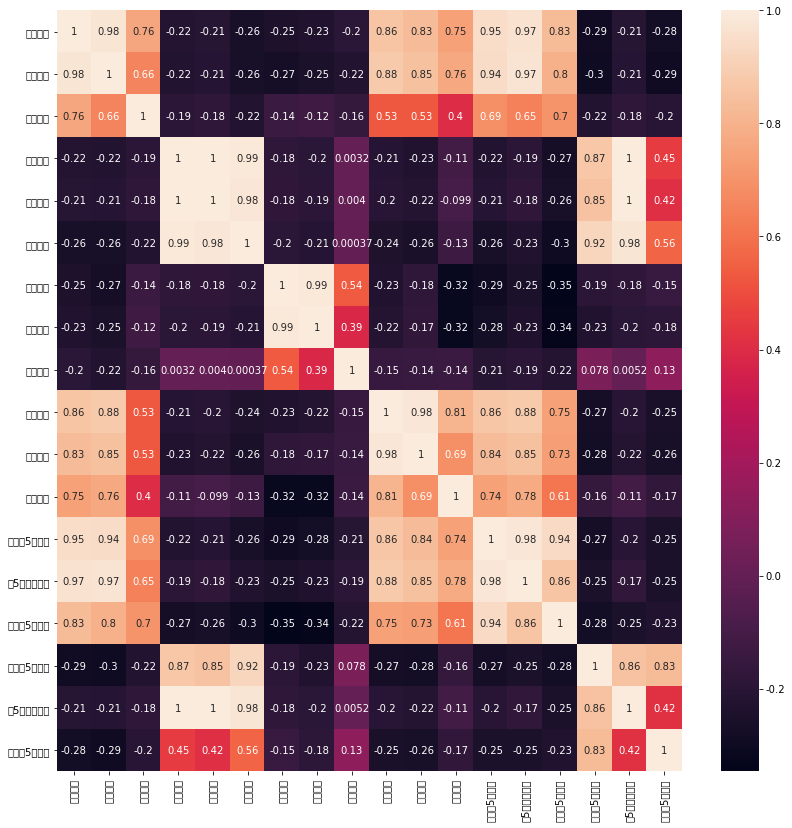

In [4]:
# 对英雄属性之间的关系进行可视化分析
# 设置 plt 正确显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# 用热力图呈现 features_mean 字段之间的相关性
corr = dataSet[features].corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True)  # annot=True 显示每个方格的数据
plt.show()

In [5]:

# 相关性大的属性保留一个，因此可以对属性进行降维
selectedFeatures = [u'最大生命', u'初始生命', u'最大法力', u'最高物攻', u'初始物攻',
                    u'最大物防', u'初始物防', u'最大每5秒回血', u'最大每5秒回蓝',
                    u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
dataSet = oriDataSet[selectedFeatures]
dataSet[u'最大攻速'] = dataSet[u'最大攻速'].apply(lambda x: float(x.strip('%')) / 100)
dataSet[u'攻击范围'] = dataSet[u'攻击范围'].map({'远程':1, '近战':0})

# 采用 Z-Score 规范化数据，保证每个特征维度的数据均值为 0，方差为 1
ss = StandardScaler()
dataSet = ss.fit_transform(dataSet)

# 构造 GMM 聚类
gmm = GaussianMixture(n_components=30, covariance_type='full')

# 训练数据
gmm.fit(dataSet)

# 产生聚类
predictCluster = gmm.predict(dataSet)
print("predictCluster is: ", predictCluster)

# 将分组结果输出到 CSV 文件中
# oriDataSet.insert(0, '分组', predictCluster)
# oriDataSet.to_csv('./hero_out.csv', index=False, sep=',')

print("score is: ", calinski_harabasz_score(dataSet, predictCluster))


predictCluster is:  [ 2  2  6 13  3  3 17  6  5  2 20 18 13 10 19 20 27  5  3  0 15  9  0  9
  9  9  0 14 26 16 10 21 21 26 16 21 26  8 24 28 21 26 26 21  4  4 18 24
 18  4 25 22  7 29 29  2 22 11 28  3 22  7 12  2 23 11 11  1 14]
score is:  22.488790628614456


<ipython-input-5-94558a3355b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet[u'最大攻速'] = dataSet[u'最大攻速'].apply(lambda x: float(x.strip('%')) / 100)
<ipython-input-5-94558a3355b1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet[u'攻击范围'] = dataSet[u'攻击范围'].map({'远程':1, '近战':0})
